In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn import preprocessing
matplotlib.style.use('ggplot')

In [10]:
Url ="http://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv"

In [11]:
df = pd.read_csv(Url)

In [12]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  2013-06-30          28.7          21.4    58.255688   
1         2.0  2013-06-30          31.9          21.6    52.263397   
2         3.0  2013-06-30          31.6          23.3    48.690479   
3         4.0  2013-06-30          32.0          23.4    58.239788   
4         5.0  2013-06-30          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  2017-08-30          23.3          17.1    26.741310   
7748     24.0  2017-08-30          23.3          17.7    24.040634   
7749     25.0  2017-08-30          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [13]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0  2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0  2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0  2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0  2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [14]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  2017-08-30          23.3          17.1    26.741310   
7748     24.0  2017-08-30          23.3          17.7    24.040634   
7749     25.0  2017-08-30          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [15]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [17]:
df.describe().T

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7682.0    29.768211    2.969999    20.000000    27.800000   
Present_Tmin      7682.0    23.225059    2.413961    11.300000    21.700000   
LDAPS_RHmin       7677.0    56.759372   14.668111    19.794666    45.963543   
LDAPS_RHmax       7677.0    88.374804    7.192004    58.936283    84.222862   
LDAPS_Tmax_lapse  7677.0    29.613447    2.947191    17.624954    27.673499   
LDAPS_Tmin_lapse  7677.0    23.512589    2.345347    14.272646    22.089739   
LDAPS_WS          7677.0     7.097875    2.183836     2.882580     5.678705   
LDAPS_LH          7677.0    62.505019   33.730589   -13.603212    37.266753   
LDAPS_CC1         7677.0     0.368774    0.262458     0.000000     0.146654   
LDAPS_CC2         7677.0     0.356080    0.258061     0.000000     0.140615   
LDAPS_CC3         7677.0     0.318404    0.250362     0.000000     0.101388   
LDAPS_CC4         7677.0     0.299191    0.254348     0.000000     0.081532   
LDAPS_PPT1        7677.0     0.591995    1.945768     0.000000     0.000000   
LDAPS_PPT2        7677.0     0.485003    1.762807     0.000000     0.000000   
LDAPS_PPT3        7677.0     0.278200    1.161809     0.000000     0.000000   
LDAPS_PPT4        7677.0     0.269407    1.206214     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7725.0    30.274887    3.128010    17.400000    28.200000   
Next_Tmin         7725.0    22.932220    2.487613    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.039024    67.190056    98.524734  
LDAPS_RHmax         89.793480    93.743629   100.000153  
LDAPS_Tmax_lapse    29.703426    31.710450    38.542255  
LDAPS_Tmin_lapse    23.760199    25.152909    29.619342  
LDAPS_WS             6.547470     8.032276    21.857621  
LDAPS_LH            56.865482    84.223616   213.414006  
LDAPS_CC1            0.315697     0.575489     0.967277  
LDAPS_CC2            0.312421     0.558694     0.968353  
LDAPS_CC3            0.262555     0.496703     0.983789  
LDAPS_CC4            0.227664     0.499489     0.974710  
LDAPS_PPT1           0.000000     0.052525    23.701544  
LDAPS_PPT2           0.000000     0.018364    21.621661  
LDAPS_PPT3           0.000000     0.007896    15.841235  
LDAPS_PPT4           0.000000     0.000041    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

In [18]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [19]:
df[df['station'].isna()]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [20]:
df[df['Date'].isna()]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [21]:
for I in df.columns:
    print(df[df[I].isna()])  # all null values in the rows wise Find null Values

      station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]
      station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283 

In [ ]:
sns.pairplot(df,diag_kind="kde")
plt.savefig("Pairplot.png",dpi=300)

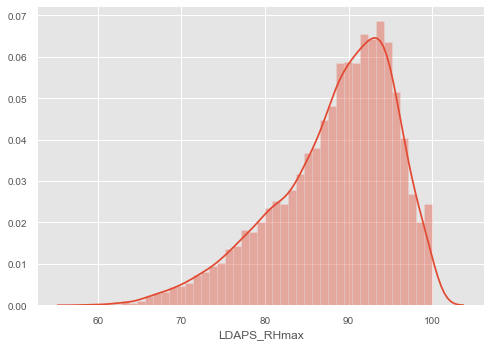

In [16]:
sns.distplot(df.LDAPS_RHmax)

In [17]:
plot = df.drop('Date',axis=1)

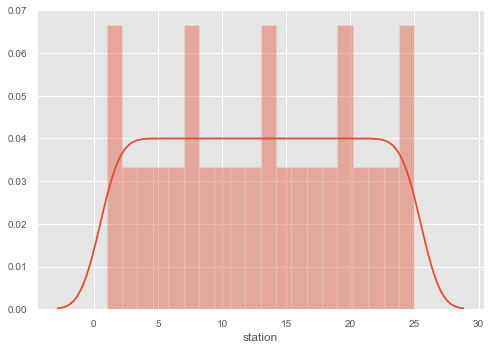

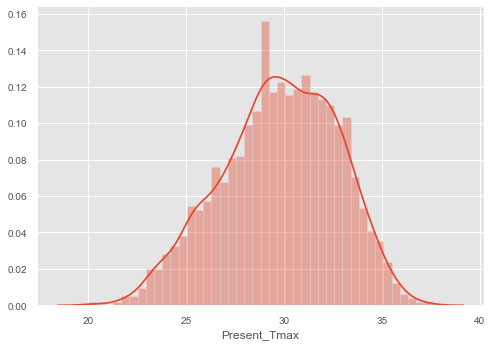

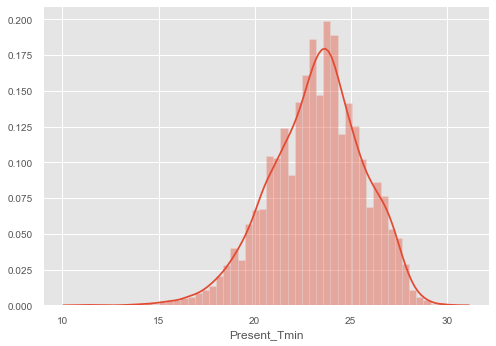

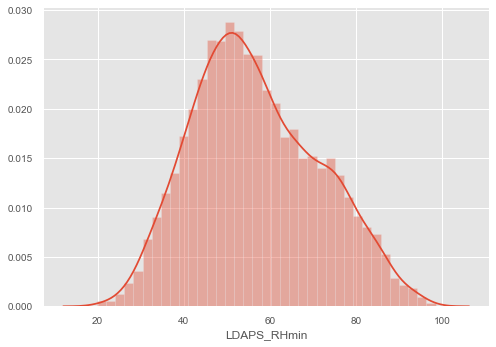

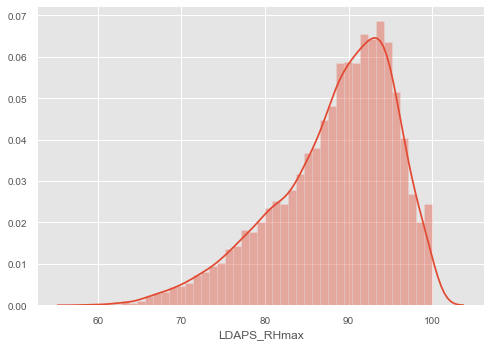

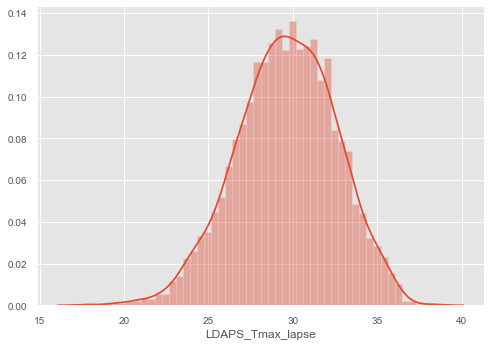

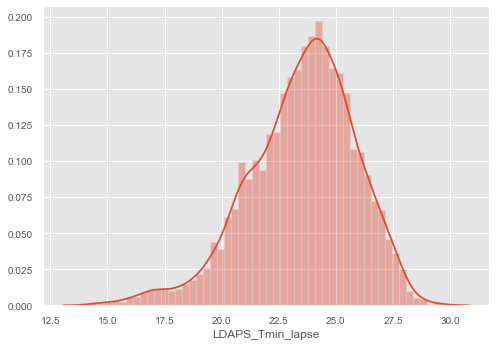

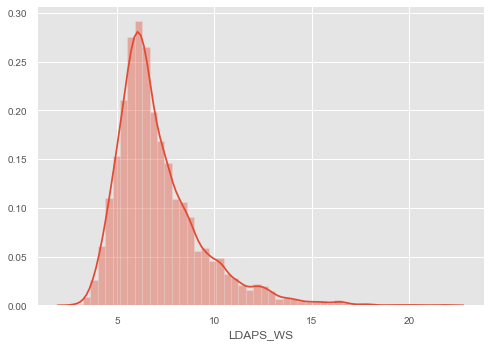

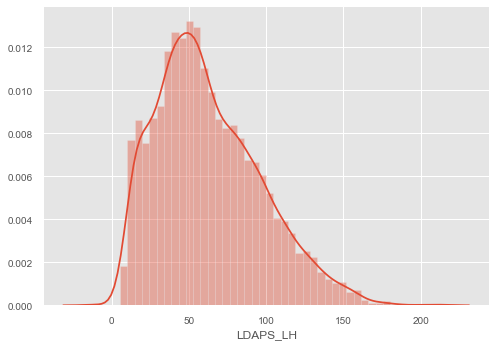

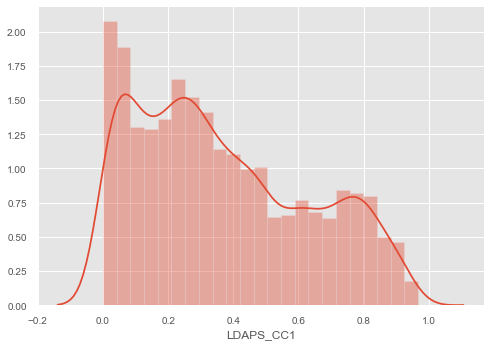

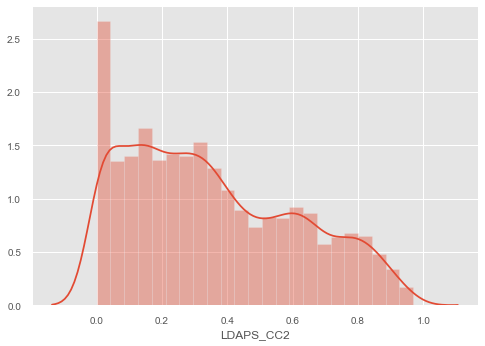

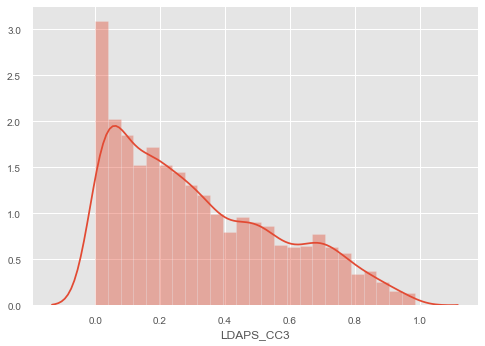

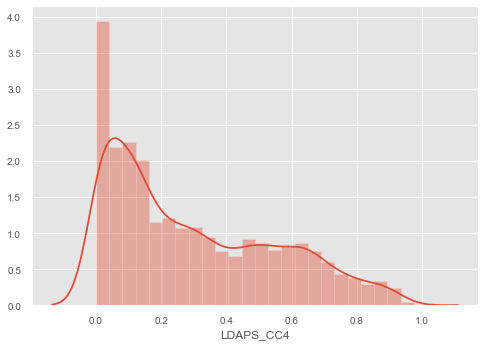

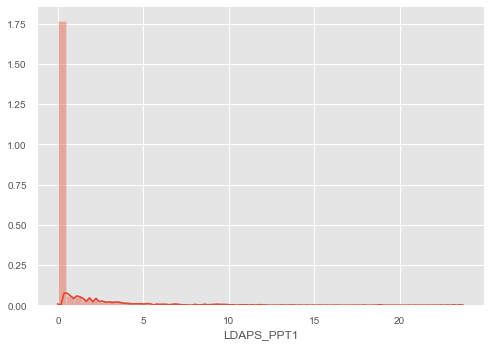

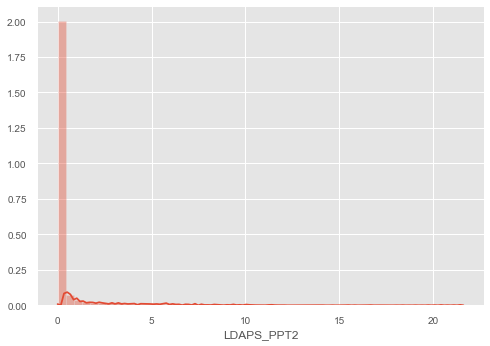

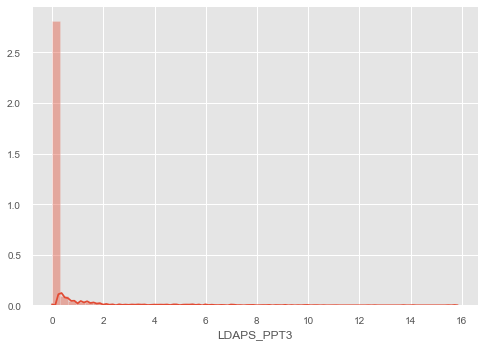

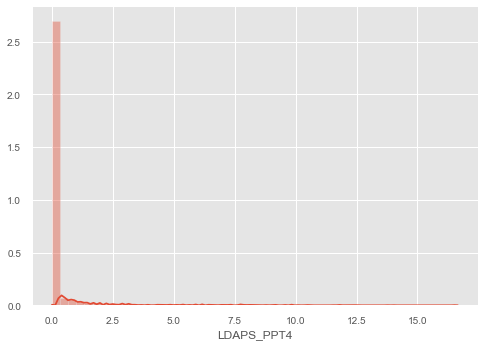

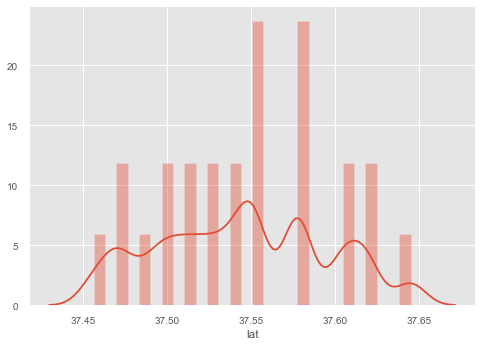

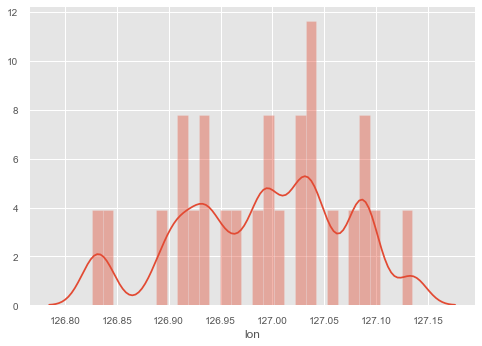

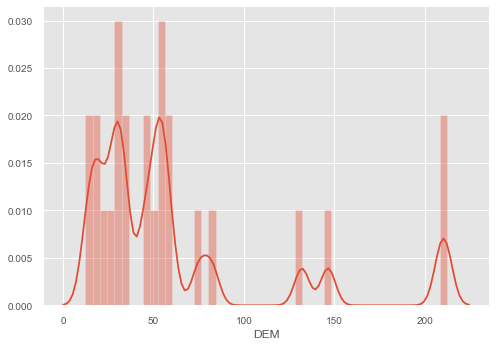

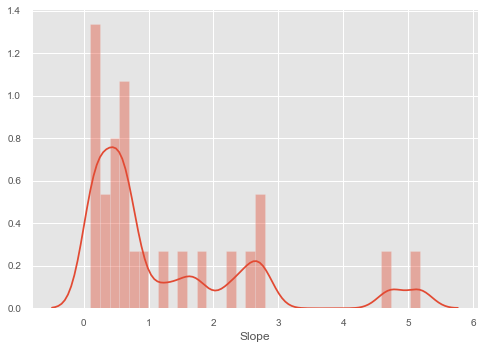

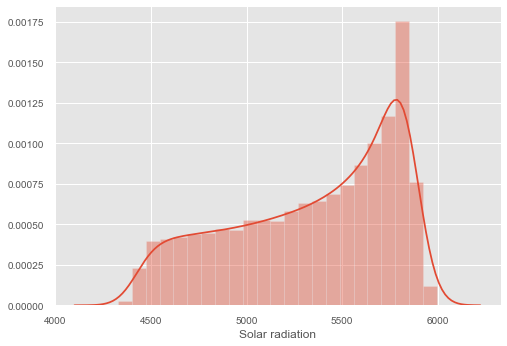

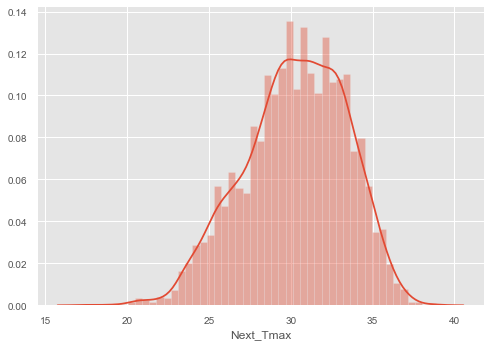

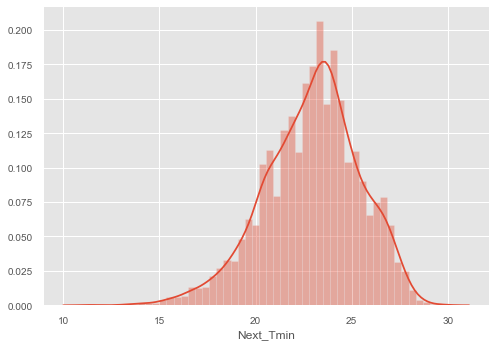

In [18]:
for I in plot.columns:
    sns.distplot(plot[I])
    plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

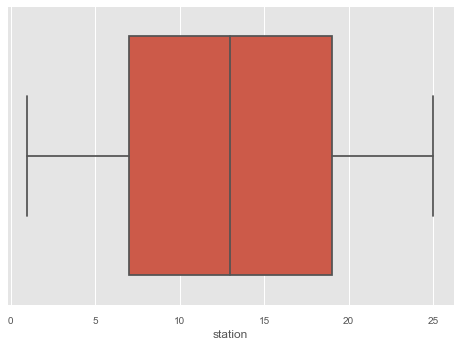

In [19]:
for I in df.columns:
    sns.boxplot(df[I])

In [20]:
df.dropna(axis=1,how='all',inplace=True)

In [21]:
Max = df[['Present_Tmax','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT4',
          'lat','lon','DEM','Slope','Solar radiation','Next_Tmax']]

In [22]:
Max.tail()

Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse   LDAPS_WS    LDAPS_LH  \
7747          23.3    78.869858         26.352081   6.148918   72.058294   
7748          23.3    77.294975         27.010193   6.542819   47.241457   
7749          23.2    77.243744         27.939516   7.289264    9.090034   
7750          20.0    58.936283         17.624954   2.882580  -13.603212   
7751          37.6   100.000153         38.542255  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT4  \
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   16.655469   

          lat      lon       DEM     Slope  Solar radiation  Next_Tmax  
7747  37.5372  126.891   15.5876  0.155400      4443.313965       28.3  
7748  37.5237  126.909   17.2956  0.222300      4438.373535       28.6  
7749  37.5237  126.970   19.5844  0.271300      4451.345215       27.8  
7750  37.4562  126.826   12.3700  0.098475      4329.520508       17.4  
7751  37.6450  127.135  212.3350  5.178230      5992.895996       38.9

In [23]:
Max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7682 non-null   float64
 1   LDAPS_RHmax       7677 non-null   float64
 2   LDAPS_Tmax_lapse  7677 non-null   float64
 3   LDAPS_WS          7677 non-null   float64
 4   LDAPS_LH          7677 non-null   float64
 5   LDAPS_CC1         7677 non-null   float64
 6   LDAPS_CC2         7677 non-null   float64
 7   LDAPS_CC3         7677 non-null   float64
 8   LDAPS_CC4         7677 non-null   float64
 9   LDAPS_PPT1        7677 non-null   float64
 10  LDAPS_PPT4        7677 non-null   float64
 11  lat               7752 non-null   float64
 12  lon               7752 non-null   float64
 13  DEM               7752 non-null   float64
 14  Slope             7752 non-null   float64
 15  Solar radiation   7752 non-null   float64
 16  Next_Tmax         7725 non-null   float64


In [24]:
Max.describe()

Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse     LDAPS_WS     LDAPS_LH  \
count   7682.000000  7677.000000       7677.000000  7677.000000  7677.000000   
mean      29.768211    88.374804         29.613447     7.097875    62.505019   
std        2.969999     7.192004          2.947191     2.183836    33.730589   
min       20.000000    58.936283         17.624954     2.882580   -13.603212   
25%       27.800000    84.222862         27.673499     5.678705    37.266753   
50%       29.900000    89.793480         29.703426     6.547470    56.865482   
75%       32.000000    93.743629         31.710450     8.032276    84.223616   
max       37.600000   100.000153         38.542255    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT4          lat          lon          DEM        Slope  \
count  7677.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.269407    37.544722   126.991397    61.867972     1.257048   
std       1.206214     0.050352     0.079435    54.279780     1.370444   
min       0.000000    37.456200   126.826000    12.370000     0.098475   
25%       0.000000    37.510200   126.937000    28.700000     0.271300   
50%       0.000000    37.550700   126.995000    45.716000     0.618000   
75%       0.000041    37.577600   127.042000    59.832400     1.767800   
max      16.655469    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax  
count      7752.000000  7725.000000  
mean       5341.502803    30.274887  
std         429.158867     3.128010  
min        4329.520508    17.400000  
25%        4999.018555    28.200000  
50%        5436.345215    30.500000  
75%        5728.316406    32.600000  
max        5992.895996    38.900000

In [25]:
Feature = Max.drop(['Next_Tmax'],axis=1)
Feature.head(2)

Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_WS   LDAPS_LH  \
0          28.7    91.116364         28.074101  6.818887  69.451805   
1          31.9    90.604721         29.850689  5.691890  51.937448   

   LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT4  \
0   0.233947   0.203896   0.161697   0.130928         0.0         0.0   
1   0.225508   0.251771   0.159444   0.127727         0.0         0.0   

       lat      lon       DEM   Slope  Solar radiation  
0  37.6046  126.991  212.3350  2.7850      5992.895996  
1  37.6046  127.032   44.7624  0.5141      5869.312500

In [26]:
Feature.replace(np.NaN,0,inplace=True)

In [27]:
Target = Max['Next_Tmax']

In [28]:
Target.isna().sum()

27

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss = StandardScaler()

In [31]:
Scaled_df = ss.fit_transform(Feature)
Scaled_df

array([[-0.1957961 ,  0.32034653, -0.3038293 , ...,  2.77224286,
         1.11500407,  1.51793488],
       [ 0.58796965,  0.27477465,  0.12701613, ..., -0.31515742,
        -0.54215762,  1.22994952],
       [ 0.51449161, -0.31585906,  0.18536551, ..., -0.52621832,
        -0.7231326 ,  1.21653443],
       ...,
       [-1.54289349, -0.91528476, -0.33646809, ..., -0.77904331,
        -0.71933797, -2.0743251 ],
       [-2.32665924, -2.54592642, -2.83788321, ..., -0.91196325,
        -0.8454552 , -2.35821196],
       [ 1.9840524 ,  1.11162375,  2.23483383, ...,  2.77224286,
         2.86143459,  1.51793488]])

In [32]:
Scaled_df = pd.DataFrame(Scaled_df,columns=Feature.columns)

In [33]:
Scaled_df.head()

Present_Tmax  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0     -0.195796     0.320347         -0.303829 -0.092185  0.221336  -0.497849   
1      0.587970     0.274775          0.127016 -0.586164 -0.292012  -0.529859   
2      0.514492    -0.315859          0.185366 -0.390529 -1.211307  -0.591169   
3      0.612462     0.798413          0.091595 -0.604503  0.112166  -0.564511   
4      0.465506     0.234730         -0.051656 -0.567266  1.350178  -0.810917   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT4       lat  \
0  -0.573957  -0.611878  -0.649048   -0.302656   -0.222227  1.189286   
1  -0.389214  -0.620851  -0.661611   -0.302656   -0.222227  1.189286   
2  -0.367227  -0.443025  -0.605101   -0.302656   -0.222227  0.653021   
3  -0.488652  -0.614027  -0.636015   -0.302656   -0.222227  1.991696   
4  -0.396068  -0.543390  -0.495614   -0.302656   -0.222227  0.118743   

        lon       DEM     Slope  Solar radiation  
0 -0.005000  2.772243  1.115004         1.517935  
1  0.511177 -0.315157 -0.542158         1.229950  
2  0.838510 -0.526218 -0.723133         1.216534  
3  0.385280 -0.297588  0.932424         1.201176  
4  1.807917 -0.494322 -0.548433         1.207205

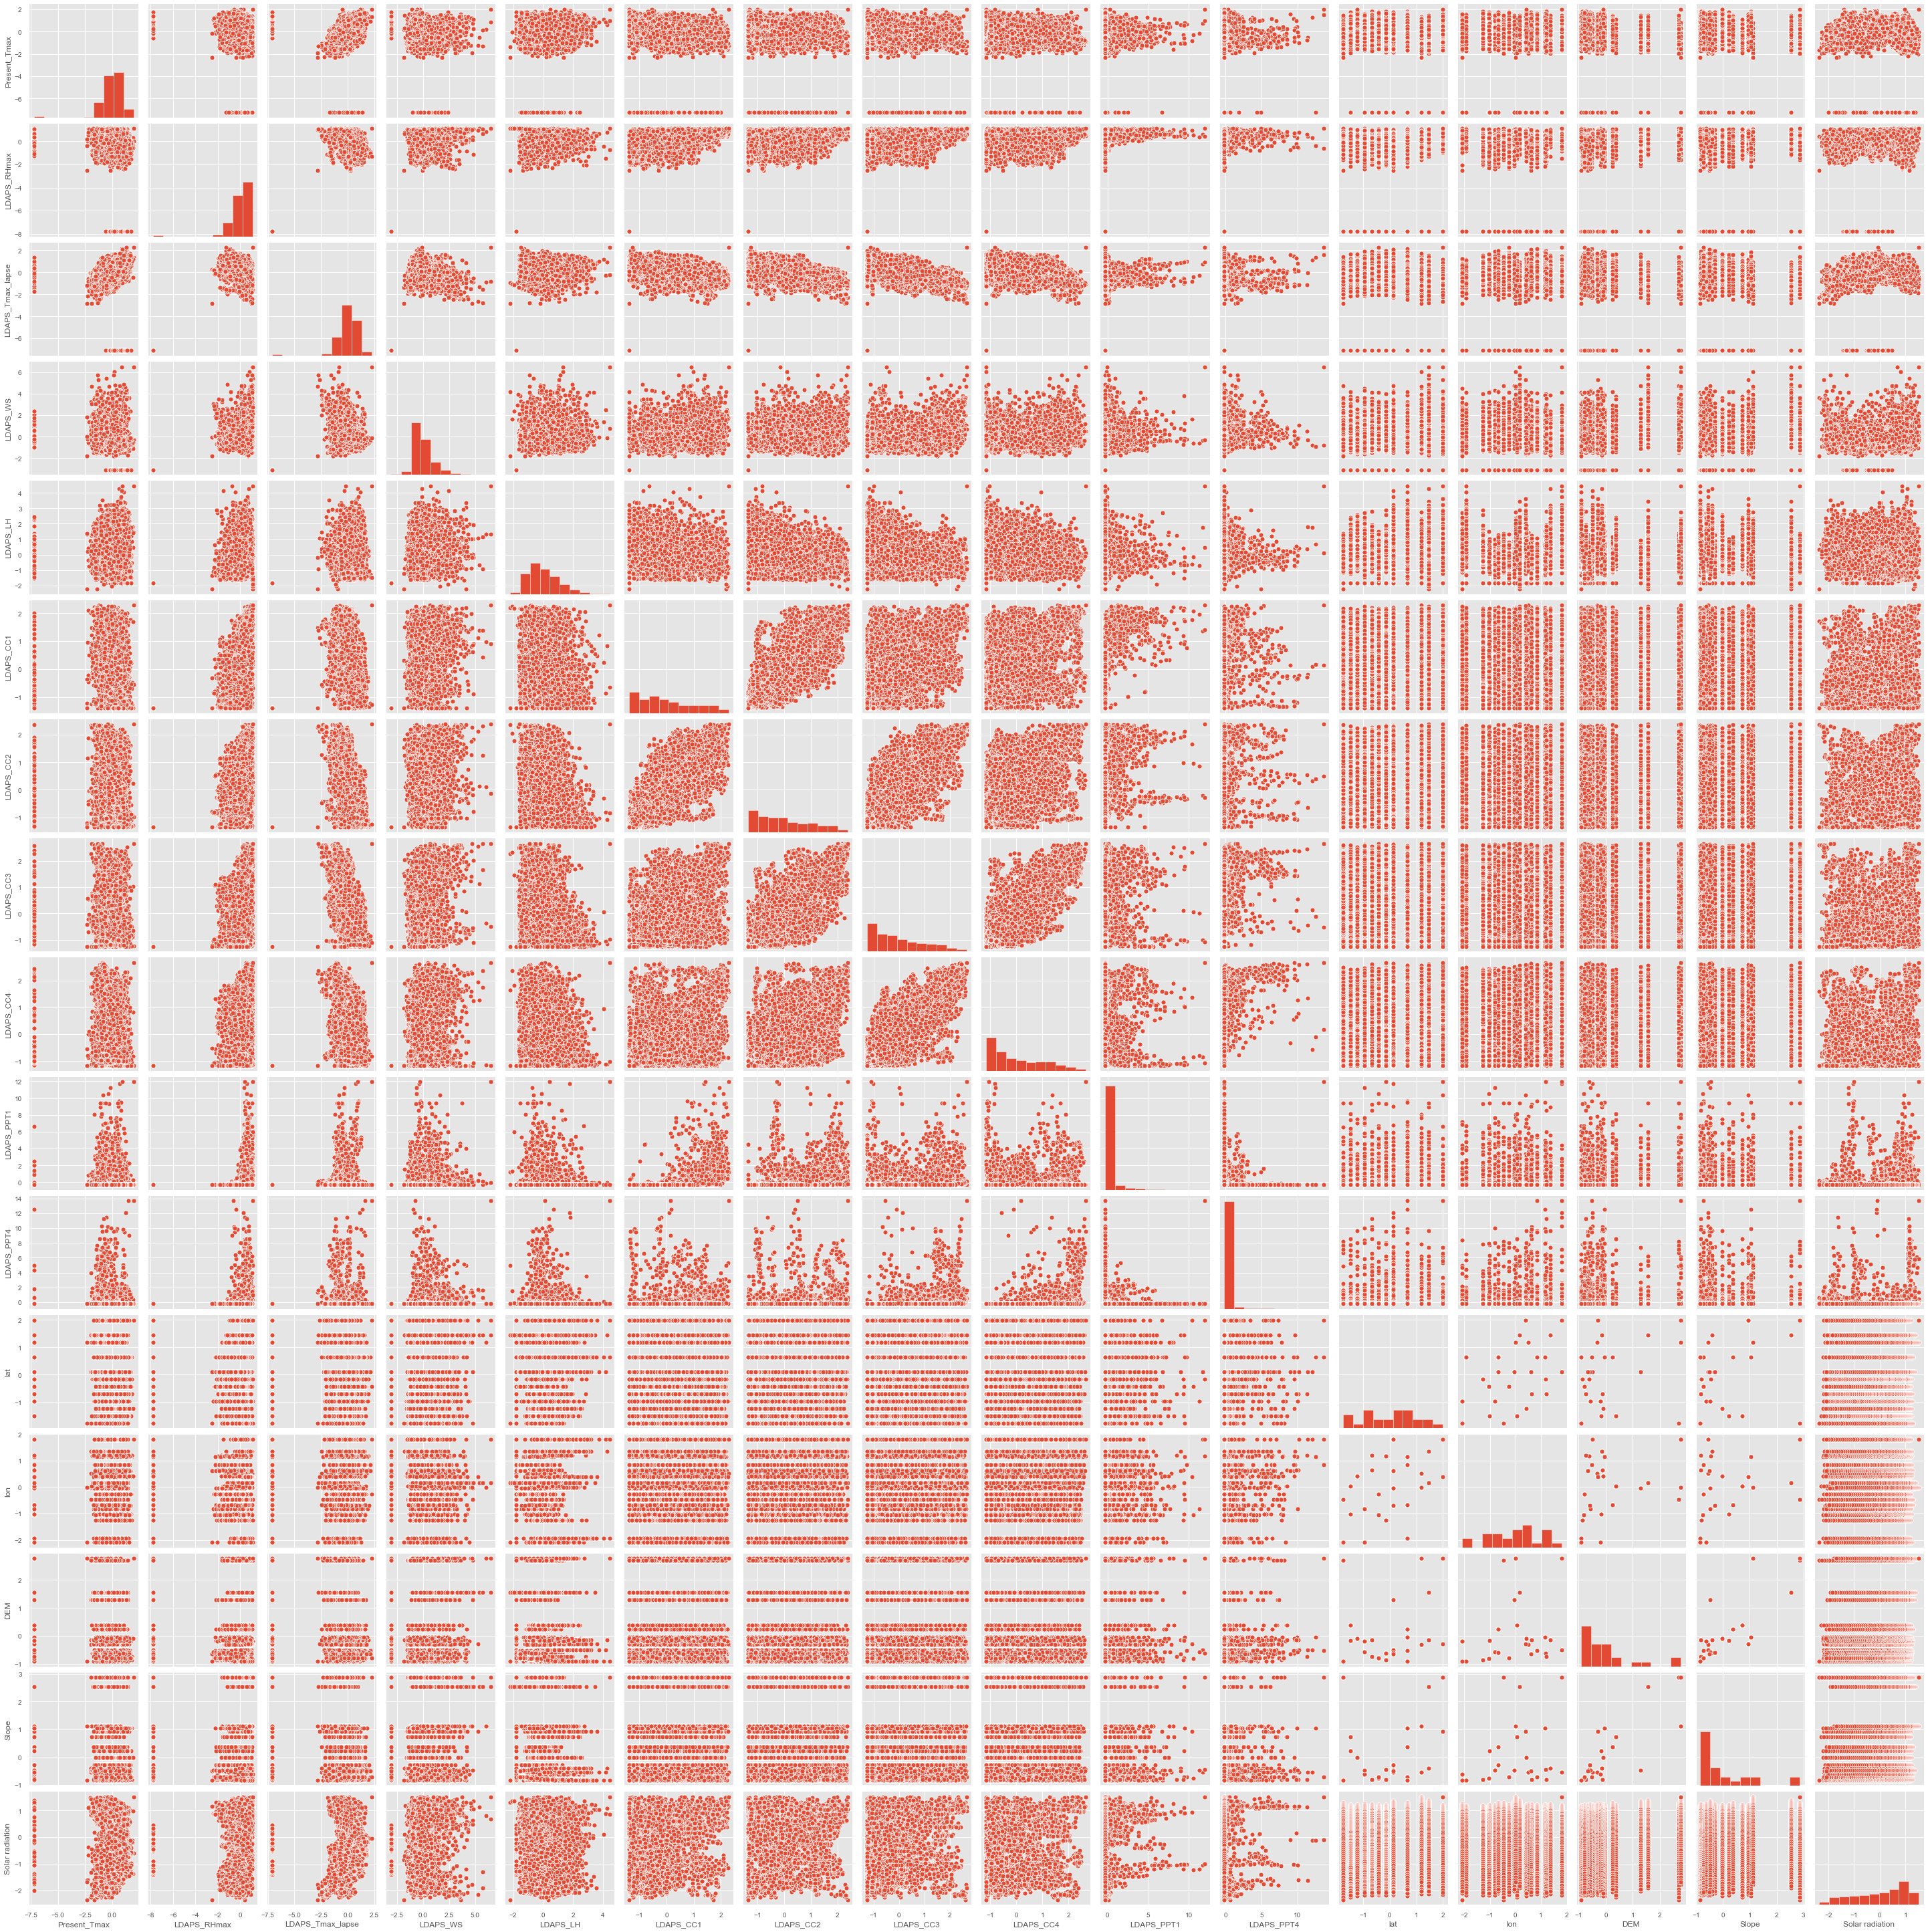

In [34]:
 sns.pairplot(Scaled_df,diag_kind = 'hist')

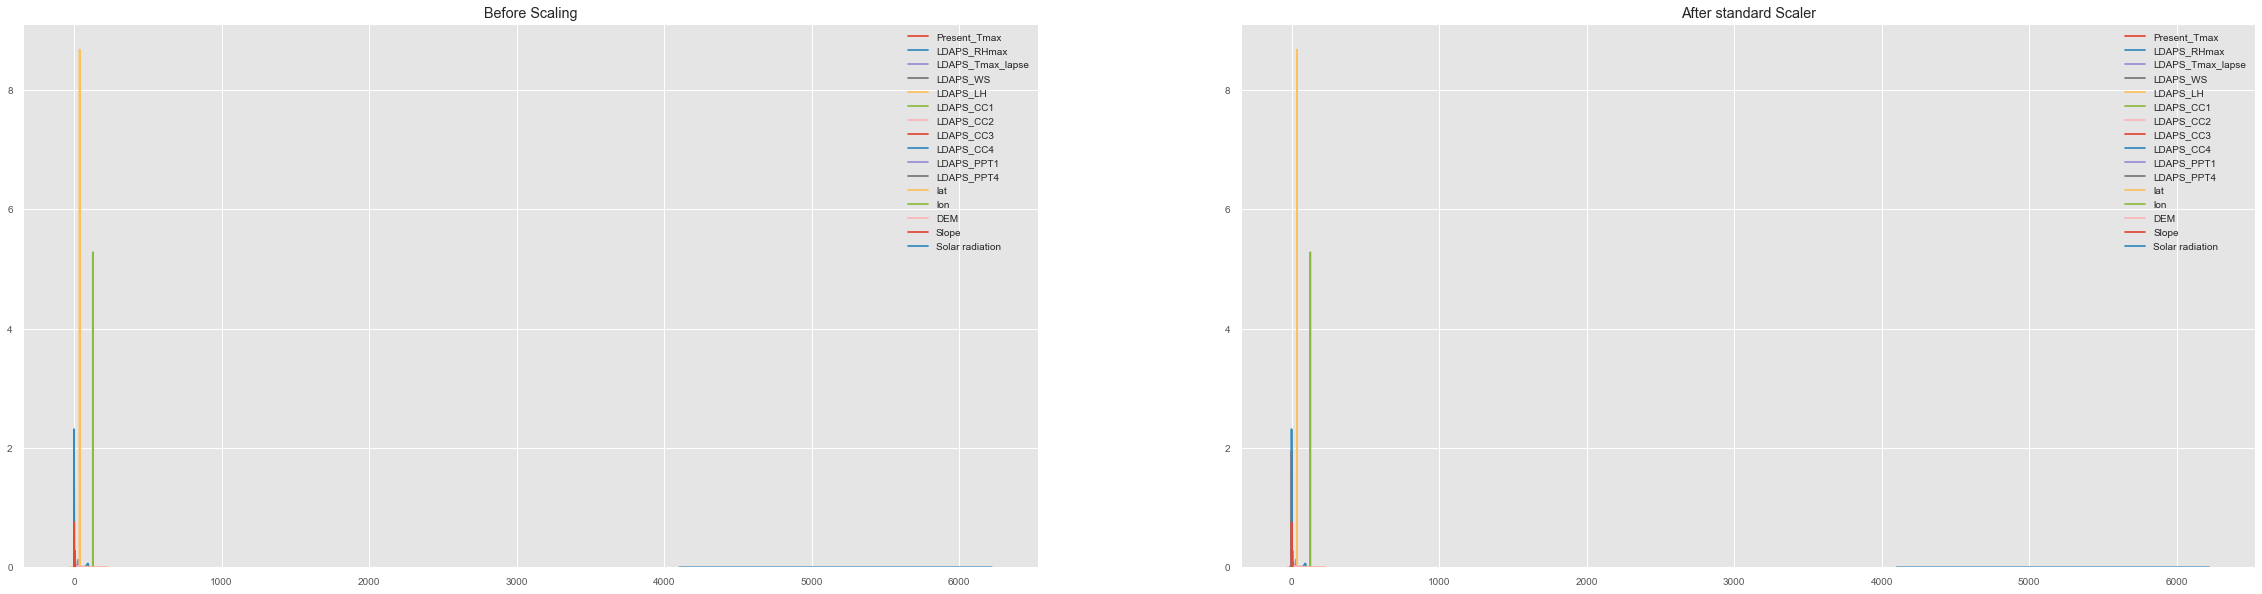

In [35]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize=(40,10))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Present_Tmax'], ax=ax1)
sns.kdeplot(df['LDAPS_RHmax'], ax=ax1)
sns.kdeplot(df['LDAPS_Tmax_lapse'], ax=ax1)
sns.kdeplot(df['LDAPS_WS'], ax=ax1)
sns.kdeplot(df['LDAPS_LH'], ax=ax1)
sns.kdeplot(df['LDAPS_CC1'], ax=ax1)
sns.kdeplot(df['LDAPS_CC2'], ax=ax1)
sns.kdeplot(df['LDAPS_CC3'], ax=ax1)
sns.kdeplot(df['LDAPS_CC4'], ax=ax1)
sns.kdeplot(df['LDAPS_PPT1'], ax=ax1)
sns.kdeplot(df['LDAPS_PPT4'], ax=ax1)
sns.kdeplot(df['lat'], ax=ax1)
sns.kdeplot(df['lon'], ax=ax1)
sns.kdeplot(df['DEM'], ax=ax1)
sns.kdeplot(df['Slope'], ax=ax1)
sns.kdeplot(df['Solar radiation'], ax=ax1)
ax2.set_title('After standard Scaler')
sns.kdeplot(Scaled_df['Present_Tmax'], ax=ax2)
sns.kdeplot(df['LDAPS_RHmax'], ax=ax2)
sns.kdeplot(df['LDAPS_Tmax_lapse'], ax=ax2)
sns.kdeplot(df['LDAPS_WS'], ax=ax2)
sns.kdeplot(df['LDAPS_LH'], ax=ax2)
sns.kdeplot(df['LDAPS_CC1'], ax=ax2)
sns.kdeplot(df['LDAPS_CC2'], ax=ax2)
sns.kdeplot(df['LDAPS_CC3'], ax=ax2)
sns.kdeplot(df['LDAPS_CC4'], ax=ax2)
sns.kdeplot(df['LDAPS_PPT1'], ax=ax2)
sns.kdeplot(df['LDAPS_PPT4'], ax=ax2)
sns.kdeplot(df['lat'], ax=ax2)
sns.kdeplot(df['lon'], ax=ax2)
sns.kdeplot(df['DEM'], ax=ax2)
sns.kdeplot(df['Slope'], ax=ax2)
sns.kdeplot(df['Solar radiation'], ax=ax2)
plt.show()